# Praca domowa 6

Daniel Zawadzki, numer albumu 333102

In [60]:
import pandas as pd
import numpy as np

In [61]:
data = pd.read_csv("Animation_Movies.csv")

In [62]:
data.shape

(51945, 23)

Ramka danych ma 51945 wierszy oraz 23 kolumny.

Poniższa tabelka przedstawia sumę braków danych w danej kolumnie:

In [63]:
data.isnull().sum()

id                          0
title                       1
vote_average                0
vote_count                  0
status                      0
release_date             2137
revenue                     0
runtime                     0
adult                       0
backdrop_path           36110
budget                      0
homepage                43692
imdb_id                 22393
original_language           0
original_title              1
overview                 6079
popularity                  0
poster_path             14011
tagline                 47267
genres                      0
production_companies    22547
production_countries    12245
spoken_languages        18127
dtype: int64

### Kolumny są typów:

id – ilościowa, zliczenia  
title – jakościowa, nominalna  
vote_average – ilościowa, ilorazowa  
vote_count – ilościowa, zliczenia  
status – jakościowa, nominalna  
release_date – ilościowa, przedziałowa  
revenue – ilościowa, ilorazowa  
runtime – ilościowa, ilorazowa  
adult – jakościowa,binarna  
backdrop_path – jakościowa, nominalna  
original_language – jakościowa, nominalna  
original_title – jakościowa, nominalna  
overview – jakościowa, nominalna 
popularity – ilościowa, ilorazowa  
poster_path – jakościowa, nominalna  
tagline – jakościowa, nominalna  
genres – jakościowa, nominalna  
production_companies – jakościowa, nominalna  
production_countries – jakościowa, nominalna  
spoken_languages – jakościowa, nominalna  

Dla ładniejszego wyglądu liczb zaokrąglijmy je do dwóch miejsc po przecinku.

In [64]:
pd.set_option('display.float_format','{:.2f}'.format)

In [65]:
data.drop(columns = 'id').describe().drop(index = 'count')

,vote_average,vote_count,revenue,runtime,budget,popularity
mean,2.60,40.40,1863464.11,20.90,575951.29,1.89
std,3.32,482.71,30498240.44,39.02,7606627.80,9.70
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,3.00,0.00,0.60
50%,0.00,0.00,0.00,7.00,0.00,0.60
75%,6.00,2.00,0.00,19.00,0.00,0.88
max,10.00,19463.00,1450026933.00,3720.00,260000000.00,1008.94


Wniosek: W ramce danych większość filmów ma bardzo małe wartości we wszystkich kolumnach, a nieliczne mają bardzo duże wartości,
zwłaszcza w kolumnach revenue i budget, co widzimy po bardzo dyżym odchyleniu standardowym.

### Filmy z którego roku mają w sumie najdłuższy czas oglądania?

In [69]:
data['year'] = data['release_date'].str[0:4]

data.groupby('year').agg({'runtime': 'sum'}).sort_values(by = "runtime", ascending = False).reset_index().head(10)

,year,runtime
0,2021,44024
1,2019,43282
2,2022,38827
3,2023,38231
4,2017,36270
5,2018,36234
6,2020,35889
7,2013,31387
8,2016,30706
9,2015,30497


### Która wytrórnia wypuściła najwięcej filmów?

In [86]:
data_exploded = data.copy()
data_exploded['production_companies'] = data_exploded['production_companies'].str.split(',')

data_exploded = data_exploded.explode('production_companies')
data_exploded['production_companies'] = data_exploded['production_companies'].str.strip()

In [89]:
data_exploded['production_companies'].value_counts().head(10)

production_companies
Warner Bros. Animation     170
Walt Disney Pictures       131
Pixar                      103
Walt Disney Productions     98
TOHO                        89
DC Entertainment            82
Toei Animation              81
DreamWorks Animation        77
Warner Bros. Pictures       75
DC Comics                   61
Name: count, dtype: int64

Najwięcej filmów wypuścił Warner Bros. Animation.

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

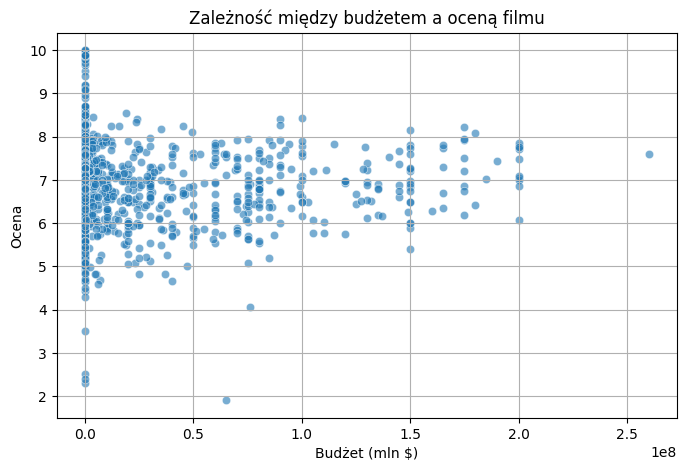

In [95]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='budget', y='vote_average', alpha=0.6)
plt.title('Zależność między budżetem a oceną filmu')
plt.xlabel('Budżet (mln $)')
plt.ylabel('Ocena')
plt.grid(True)
plt.show()

Wniosek: nie ma korelacji między budżetem filmu, a jego średnią oceną przez głosujących.

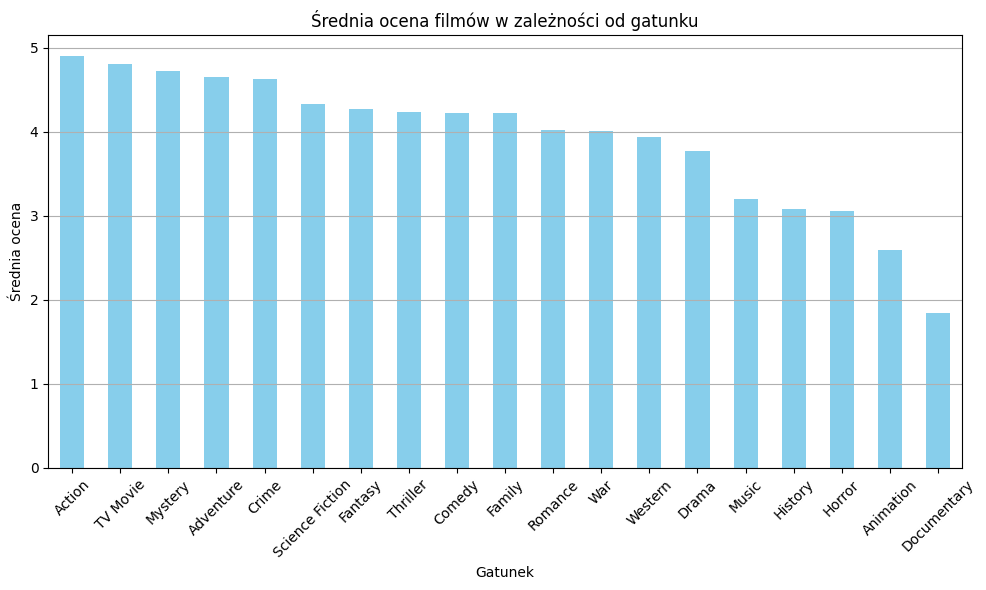

In [98]:
data_genre = data.copy()
data_genre['genres'] = data_genre['genres'].str.split(',')
data_genre = data_genre.explode('genres')
data_genre['genres'] = data_genre['genres'].str.strip()

genre_rating = data_genre.groupby('genres')['vote_average'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
genre_rating.plot(kind='bar', color='skyblue')
plt.title('Średnia ocena filmów w zależności od gatunku')
plt.xlabel('Gatunek')
plt.ylabel('Średnia ocena')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Wniosek: Najwyższe oceny mają filmy akcji, a najniższe filmy dokumentalne.